In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


data = pd.read_csv('team2.csv', index_col=0)
data

In [2]:
X_data = data.iloc[:,1:]
X_data
y_data = data.iloc[:,0]
y_data

2000    640089
2001    559934
2002    496911
2003    495036
2004    476958
2005    438707
2006    451759
2007    496822
2008    465892
2009    444849
2010    470171
2011    471265
2012    484550
2013    436455
2014    435435
2015    438420
2016    406243
2017    357771
2018    326822
Name: 출생아수, dtype: int64

# Min-max

In [3]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # kmean, PCA는 전처리에 민감하다.


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=0)

scaler=MinMaxScaler().fit(X_train) # 이렇게 연결하는 것을  chaining
X_train_scaled=scaler.transform(X_train)

svm=SVR()
svm.fit(X_train_scaled, y_train)

X_test_scaled=scaler.transform(X_test) # 테스트데이터도 해준다.

print('테스트 점수 : {:.2f}'.format(svm.score(X_test_scaled, y_test)))

import statsmodels.api as sm
result = sm.OLS(y_train, X_train_scaled).fit()
result.summary()

C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


테스트 점수 : -0.02


C:\Users\ICT01_18\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
C:\Users\ICT01_18\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\ICT01_18\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\ICT01_18\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\ICT01_18\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   출생아수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 21 Jan 2020   Prob (F-statistic):                nan
Time:                        19:58:07   Log-Likelihood:                 272.94
No. Observations:                  14   AIC:                            -517.9
Df Residuals:                       0   BIC:                            -508.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.508e+05        inf          0        nan         nan         nan
x2         -2.886e+04        inf         -0        nan         nan         nan
x3           -1.1e+04        inf         -0        nan         nan         nan
x4         -2.308e+04        inf         -0        nan         nan         nan
x5         -3.222e+04        inf         -0        nan         nan         nan
x6          1.375e+05        inf          0        nan         nan         nan
x7          8.921e+04        inf          0        nan         nan         nan
x8          1.141e+05        inf          0        nan         nan         nan
x9          3.374e+04        inf          0        nan         nan         nan
x10         1.004e+05        inf          0        nan         nan         nan
x11         2436.7060        inf          0        nan         nan         nan
x12         2.819e+04        inf          0        nan         nan         nan
x13         3.556e+04        inf          0        nan         nan         nan
x14        -4.278e+04        inf         -0        nan         nan         nan
x15        -1.051e+04        inf         -0        nan         nan         nan
x16        -1.091e+05        inf         -0        nan         nan         nan
x17        -6.717e+04        inf         -0        nan         nan         nan
x18         9.458e+04        inf          0        nan         nan         nan
x19         6.682e+04        inf          0        nan         nan         nan
x20         1.036e+05        inf          0        nan         nan         nan
x21         5.547e+04        inf          0        nan         nan         nan
x22        -6092.1688        inf         -0        nan         nan         nan
x23         1.302e+04        inf          0        nan         nan         nan
x24         1.261e+04        inf          0        nan         nan         nan
x25         9.496e+04        inf          0        nan         nan         nan
x26        -2.142e+05        inf         -0        nan         nan         nan
x27         1.328e+05        inf          0        nan         nan         nan
x28         1.324e+04        inf          0        nan         nan         nan
x29        -4.214e+04        inf         -0        nan         nan         nan
x30        -5.387e+04        inf         -0        nan         nan         nan
x31          1.35e+05        inf          0        nan         nan         nan
==============================================================================
Omnibus:                        3.420   Durbin-Watson:                   1.626
Prob(Omnibus):                  0.181   Jarque-Bera (JB):                1.440
Skew:                           0.401   Prob(JB):                        0.487
Kurtosis:                       1.649   Cond. No.                         94.4
==

In [4]:
# 격자 : 그물망
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.001,0.01,0.1,1,10,100], 
           'gamma':[0.001,0.01,0.1,1,10,100]}

grid=GridSearchCV(SVR(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print('최상의 교차 검증 정확도 : {:.2f}'.format(grid.best_score_))
print('테스트 점수 : {:.2f}'.format(grid.score(X_test_scaled,y_test)))
print('최적의 매개변수 : ',grid.best_params_)

최상의 교차 검증 정확도 : -0.63
테스트 점수 : -0.01
최적의 매개변수 :  {'C': 100, 'gamma': 0.1}


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# ?


In [5]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # kmean, PCA는 전처리에 민감하다.


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=0)

scaler=MinMaxScaler().fit(X_train) # 이렇게 연결하는 것을  chaining
X_train_scaled=scaler.transform(X_train)

svm=SVR()
svm.fit(X_train_scaled, y_train)

X_test_scaled=scaler.transform(X_test) # 테스트데이터도 해준다.

print('테스트 점수 : {:.2f}'.format(svm.score(X_test_scaled, y_test)))

테스트 점수 : -0.02


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [6]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 참조 : 파라미터 전달 이름을 뭊여준다.
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm',SVR())])
pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print('테스트 점수 : {:.2f}'.format(pipe.score(X_test, y_test)))

-0.007661735558475602
테스트 점수 : -0.02


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [7]:
# 격자 : 그물망
# pipeline + GridSearchCV은 다양한 테스트 문제를 해결
from sklearn.model_selection import GridSearchCV

# ragularization 규제 : 과적합 방지
param_grid={#'pca__n_components':[0.001,0.01,0.1,1,10],
    'svm__C':[0.001,0.01,0.1,1,10,100], # 처음엔 대충 결정되면 그거에서 좀더 작게
           'svm__gamma':[0.001,0.01,0.1,1,10,100]}

grid=GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print('최상의 교차 검증 정확도 : {:.2f}'.format(grid.best_score_))
print('테스트 점수 : {:.2f}'.format(grid.score(X_test_scaled,y_test)))
print('최적의 매개변수 : ',grid.best_params_)

최상의 교차 검증 정확도 : -0.63
테스트 점수 : -0.01
최적의 매개변수 :  {'svm__C': 100, 'svm__gamma': 0.1}


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:
%matplotlib inline
from sklearn.model_selection import cross_val_score # cv
from sklearn import tree

# 
clf = tree.DecisionTreeRegressor(random_state=0)
clf=clf.fit(X_data, y_data)
tree.plot_tree(clf)

[Text(76.72500000000001, 206.56799999999998, 'X[8] <= 983988.594\nmse = 4253544270.061\nsamples = 19\nvalue = 462846.789'),
 Text(27.900000000000002, 184.824, 'X[11] <= 23.32\nmse = 1606206006.25\nsamples = 2\nvalue = 600011.5'),
 Text(13.950000000000001, 163.07999999999998, 'mse = 0.0\nsamples = 1\nvalue = 559934.0'),
 Text(41.85, 163.07999999999998, 'mse = 0.0\nsamples = 1\nvalue = 640089.0'),
 Text(125.55000000000001, 184.824, 'X[20] <= 18.55\nmse = 2091161931.121\nsamples = 17\nvalue = 446709.765'),
 Text(69.75, 163.07999999999998, 'X[8] <= 1733845.875\nmse = 1068341180.667\nsamples = 3\nvalue = 363612.0'),
 Text(55.800000000000004, 141.336, 'mse = 0.0\nsamples = 1\nvalue = 406243.0'),
 Text(83.7, 141.336, 'X[26] <= 261038.5\nmse = 239460150.25\nsamples = 2\nvalue = 342296.5'),
 Text(69.75, 119.592, 'mse = 0.0\nsamples = 1\nvalue = 326822.0'),
 Text(97.65, 119.592, 'mse = 0.0\nsamples = 1\nvalue = 357771.0'),
 Text(181.35000000000002, 163.07999999999998, 'X[17] <= 80.4\nmse = 51356

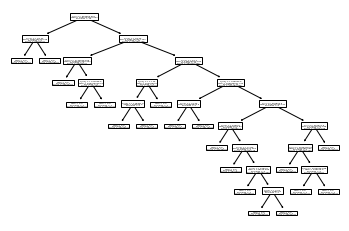

In [9]:
clf=clf.fit(X_data, y_data)
tree.plot_tree(clf)

In [10]:
cross_val_score(clf, X_data, y_data, cv=9)

array([-2.47026553e+00, -2.73714532e+01, -2.36324704e+01, -6.98641421e+00,
       -9.65564785e+00, -2.52259595e+01, -4.46619533e+03, -1.52951584e+01,
       -1.70765568e+01])

In [11]:
clf.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR # support vector classifier
from sklearn.decomposition import  PCA # priciple component analysis

# 리스트로 묵어서 파이프라인에 ?
estimators=[('reduce_dim', PCA()), ('clf', SVR())]
pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [13]:
data.corr().iloc[:,0]

출생아수            1.000000
졸업자수           -0.546187
사교육비            0.351348
인구             -0.806956
직장가입자          -0.589719
지역가입자          -0.530373
사회단체참여율        -0.307462
수출             -0.709129
수입             -0.653313
실질국내총생산(GDP)   -0.805866
1인당주거면적        -0.566131
고등교육이수율        -0.816703
원자료            -0.279709
e러닝시장규모        -0.766230
문화여가지출률        -0.694933
지니계수            0.567716
다문화출생아수        -0.416526
전국 이혼건수         0.428730
TV (%)          0.668100
라디오 (%)         0.617048
신문 (%)          0.682999
유소년부양비          0.776362
노년부양비          -0.839444
노령화지수          -0.807482
사망자수           -0.711671
실업률             0.314853
1인가구 비율        -0.776234
혼인건수(건)         0.727594
주택매매가격동향        0.133825
\t맞벌이가구비율      -0.716599
유치원수           -0.687933
어린이집수          -0.594952
Name: 출생아수, dtype: float64

In [14]:
del data['사교육비']
del data['사회단체참여율']
del data['다문화출생아수']
del data['전국 이혼건수 ']
del data['실업률']
del data['주택매매가격동향']

In [15]:
data.corr()

,출생아수,졸업자수,인구,직장가입자,지역가입자,수출,수입,실질국내총생산(GDP),1인당주거면적,고등교육이수율,...,신문 (%),유소년부양비,노년부양비,노령화지수,사망자수,1인가구 비율,혼인건수(건),\t맞벌이가구비율,유치원수,어린이집수
출생아수,1.000000,-0.546187,-0.806956,-0.589719,-0.530373,-0.709129,-0.653313,-0.805866,-0.566131,-0.816703,...,0.682999,0.776362,-0.839444,-0.807482,-0.711671,-0.776234,0.727594,-0.716599,-0.687933,-0.594952
졸업자수,-0.546187,1.000000,0.669473,0.600956,0.512207,0.466789,0.351908,0.660709,0.530389,0.625056,...,-0.732760,-0.632010,0.693570,0.724253,0.799588,0.719416,-0.810832,0.722998,0.438396,0.791589
인구,-0.806956,0.669473,1.000000,0.891847,0.859049,0.948106,0.891605,0.996341,0.916673,0.992203,...,-0.923735,-0.995506,0.993022,0.989075,0.891437,0.965361,-0.731862,0.911490,0.934457,0.839203
직장가입자,-0.589719,0.600956,0.891847,1.000000,0.989380,0.836888,0.775431,0.873391,0.953615,0.846860,...,-0.966763,-0.876779,0.863656,0.890835,0.879824,0.838871,-0.655556,0.778300,0.833719,0.888771
지역가입자,-0.530373,0.512207,0.859049,0.989380,1.000000,0.838669,0.793440,0.839671,0.955218,0.817206,...,-0.924724,-0.850975,0.819494,0.843877,0.821947,0.797841,-0.552070,0.733263,0.844152,0.819581
수출,-0.709129,0.466789,0.948106,0.836888,0.838669,1.000000,0.986618,0.958256,0.899112,0.958352,...,-0.825968,-0.965548,0.931572,0.914918,0.775568,0.922343,-0.551829,0.863708,0.967290,0.693832
수입,-0.653313,0.351908,0.891605,0.775431,0.793440,0.986618,1.000000,0.906059,0.856079,0.909447,...,-0.744964,-0.916703,0.871243,0.847584,0.690792,0.860985,-0.449678,0.814568,0.946335,0.594888
실질국내총생산(GDP),-0.805866,0.660709,0.996341,0.873391,0.839671,0.958256,0.906059,1.000000,0.901554,0.993627,...,-0.911281,-0.995702,0.994949,0.988059,0.886729,0.975027,-0.733213,0.919571,0.932461,0.827416
1인당주거면적,-0.566131,0.530389,0.916673,0.953615,0.955218,0.899112,0.856079,0.901554,1.000000,0.891974,...,-0.900927,-0.920849,0.875153,0.887941,0.801937,0.855925,-0.542003,0.810343,0.918055,0.808961
고등교육이수율,-0.816703,0.625056,0.992203,0.846860,0.817206,0.958352,0.909447,0.993627,0.891974,1.000000,...,-0.877894,-0.994436,0.987736,0.973247,0.847525,0.958911,-0.689188,0.896133,0.950619,0.783531


In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # kmean, PCA는 전처리에 민감하다.


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=0)


In [17]:
import sklearn.metrics as metrics
model = SVR(gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('SVM 정확도:%.2f'%(metrics.accuracy_score(y_test, y_pred)*100),"%")

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [18]:
# 문제
# load_boston()을 이용해 데이터를 로딩하고 rf로 변수중요도를 출력
from sklearn.datasets import load_boston # 회귀 or 분류
from sklearn.ensemble import RandomForestRegressor
boston = load_boston()

X = X_data
y = y_data
names = data.columns[1:]


rf = RandomForestRegressor()
rf.fit(X,y)

# print((y==rf.predict(X)).mean())

C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [19]:
print(sorted(zip(map(lambda x: round(x,2), rf.feature_importances_), names), reverse=True)) # 내림차순

[(0.27, '고등교육이수율'), (0.09, '직장가입자'), (0.09, '1인가구 비율'), (0.09, '\t맞벌이가구비율'), (0.07, '사망자수'), (0.07, '노령화지수'), (0.06, '혼인건수(건)'), (0.05, 'TV (%)'), (0.03, '1인당주거면적'), (0.02, '인구'), (0.02, '노년부양비'), (0.01, '졸업자수'), (0.01, '유치원수'), (0.01, '유소년부양비'), (0.01, '신문 (%)'), (0.01, '수입'), (0.01, '라디오 (%)'), (0.0, '지역가입자'), (0.0, '지니계수'), (0.0, '원자료'), (0.0, '어린이집수'), (0.0, '실질국내총생산(GDP)'), (0.0, '수출'), (0.0, '문화여가지출률'), (0.0, 'e러닝시장규모')]


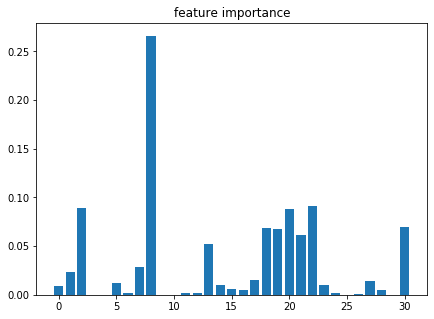

In [20]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))

ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)

ax.set_title('feature importance')
plt.show()

In [21]:
# 평가 : 예측 - tkdrhksrPtn, mse()
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_squared_error(y, rf.predict(X))

594531654.6705267

In [22]:
print(rf.predict(X))
print(y)

[554593.2 540557.5 500843.  493790.7 471115.6 449470.2 454781.5 466747.7
 463787.7 454254.9 467638.8 465631.5 470019.5 441264.5 447107.6 431643.5
 412678.4 370384.6 369042. ]
2000    640089
2001    559934
2002    496911
2003    495036
2004    476958
2005    438707
2006    451759
2007    496822
2008    465892
2009    444849
2010    470171
2011    471265
2012    484550
2013    436455
2014    435435
2015    438420
2016    406243
2017    357771
2018    326822
Name: 출생아수, dtype: int64


In [23]:
mean_absolute_error(y, rf.predict(X))

14657.157894736845

In [24]:
r2_score(y,rf.predict(X))

0.8602267622191673

In [25]:
import pandas as pd

data['PRICE'] = y_data
print(data.info())
print(data.describe())

import xgboost as xgb
from sklearn.metrics import mean_squared_error # 평가

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 2000 to 2018
Data columns (total 27 columns):
출생아수            19 non-null int64
졸업자수            19 non-null float64
인구              19 non-null float64
직장가입자           19 non-null float64
지역가입자           19 non-null float64
수출              19 non-null float64
수입              19 non-null float64
실질국내총생산(GDP)    19 non-null float64
1인당주거면적         19 non-null float64
고등교육이수율         19 non-null float64
원자료             19 non-null float64
e러닝시장규모         19 non-null float64
문화여가지출률         19 non-null float64
지니계수            19 non-null float64
TV (%)          19 non-null float64
라디오 (%)         19 non-null float64
신문 (%)          19 non-null float64
유소년부양비          19 non-null float64
노년부양비           19 non-null float64
노령화지수           19 non-null float64
사망자수            19 non-null float64
1인가구 비율         19 non-null float64
혼인건수(건)         19 non-null float64
	맞벌이가구비율        19 non-null float64
유치원수            19 non-null in

C:\Users\ICT01_18\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ICT01_18\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:58:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 131443.003360


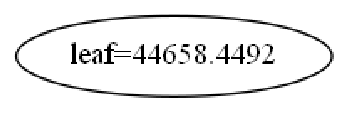

In [26]:
# 데이터프레임은 ndarray + dict(순서를 보장, 중복을 허용)
X,y = X_data, y_data # 추가된 데이터
data_dmatrix = xgb.DMatrix(data=X, label=y) # 전용행렬 자기들만의 전용 포맷?

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)


xg_reg=xgb.XGBRegressor(objective='reg:linear', colsample_bytree=0.3, learning_rate=0.1,max_depath=5,alpha=10,n_estimators=10)

xg_reg.fit(X_train, y_train)
preds=xg_reg.predict(X_test) #  y_bar 예측치
rmse=np.sqrt(mean_squared_error(y_test, preds))
print('RMSE : %f'%(rmse))

xgb.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50,20]
plt.show()

In [27]:
dd = pd.DataFrame({'y_data':y_test,'preds':preds})
dd
y_test
# preds

2018    326822
2005    438707
2004    476958
2016    406243
Name: 출생아수, dtype: int64

In [28]:
dd.corr()

,y_data,preds
y_data,1.000000,0.967587
preds,0.967587,1.000000


In [ ]:
#feature_seletion
from sklearn.datasets import make_friedman1 # 데이터 생성
from sklearn.feature_selection import RFE# Recursive Feature Elimation(재귀적으로 특징 제거)
from sklearn.svm import SVR


# regression(회귀) : 예측, SVC(clasification) : 분류
estimator=SVR(kernel='linear')  # 선형 회귀
selector =RFE(estimator, 16, step=1)# 변수를 5개만 남기겠다.
# step : 한번에 하나씩 제거
# 변수 제거 이유 : 잡음제거, 노이즈 제거
selector = selector.fit(X_data,y_data)
print(selector.support_,'\n')
print(selector.ranking_)

In [ ]:
[(0.15, '유소년부양비'), (0.12, '인구'), (0.12, '고등교육이수율'), (0.09, '실질국내총생산(GDP)'), (0.08, '원자료'), (0.08, '실업률'), (0.08, '1인가구 비율'), (0.05, '노년부양비'), (0.04, '문화여가지출률'), (0.03, '신문 (%)'), (0.03, '노령화지수'), (0.03, 'TV (%)'), (0.02, '전국 이혼건수 '), (0.02, '사망자수'), (0.02, '사교육비'), (0.01, '주택매매가격동향'), (0.01, '어린이집수'), (0.01, '수출'), (0.01, 'e러닝시장규모'), (0.0, '혼인건수(건)'), (0.0, '직장가입자'), (0.0, '지역가입자'), (0.0, '지니계수'), (0.0, '졸업자수'), (0.0, '유치원수'), (0.0, '수입'), (0.0, '사회단체참여율'), (0.0, '라디오 (%)'), (0.0, '다문화출생아수'), (0.0, '1인당주거면적'), (0.0, '\t맞벌이가구비율')]

In [ ]:
dat